In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
batch_sizes = [64, 128, 256, 512]

dfs = {}
for size in batch_sizes:
    dfs[size] = pd.read_csv(f'./gradient_confusion_results_ResNet44_CIFAR10_batch_size_{size}.csv')

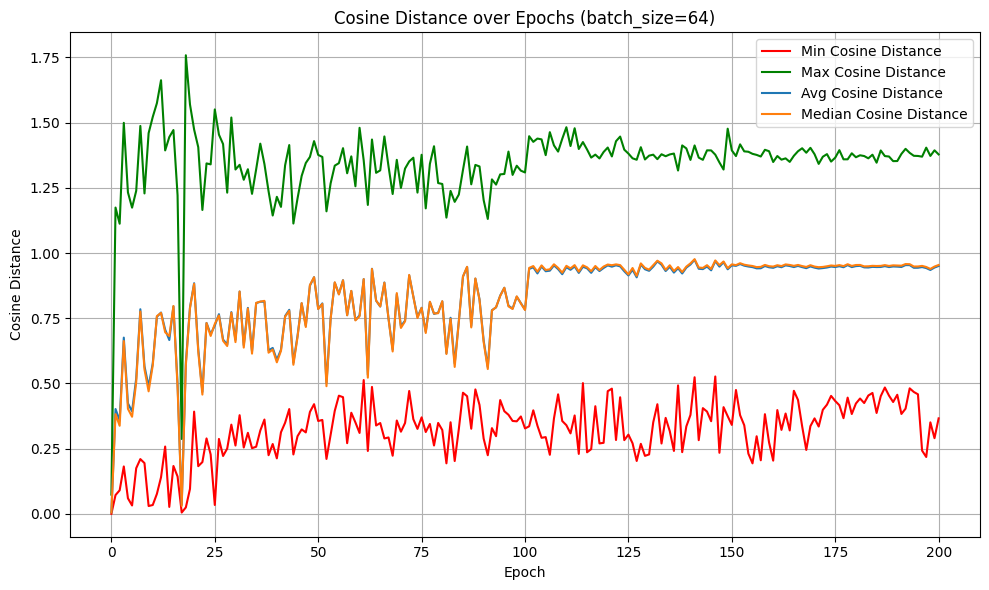

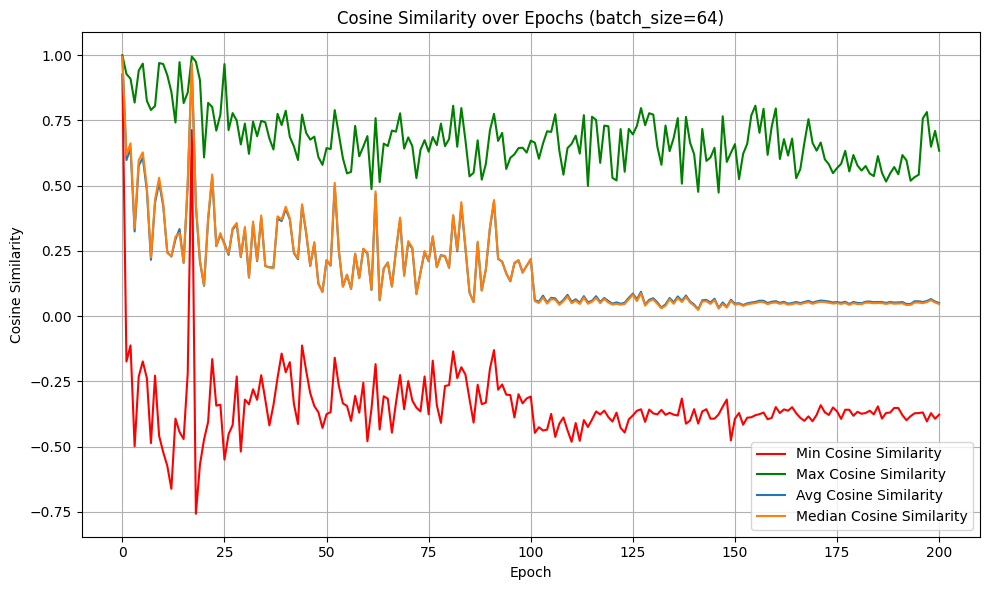

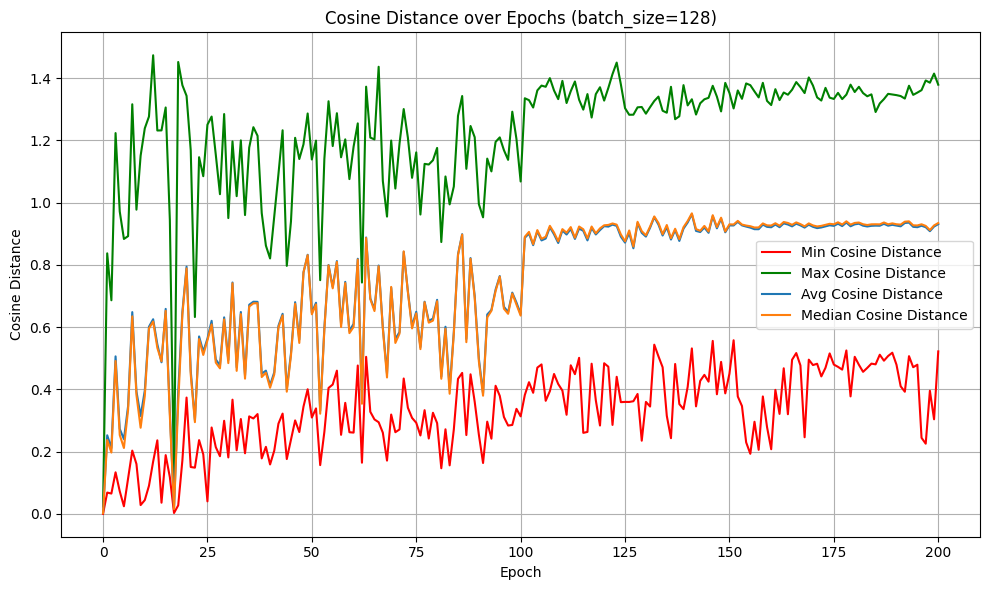

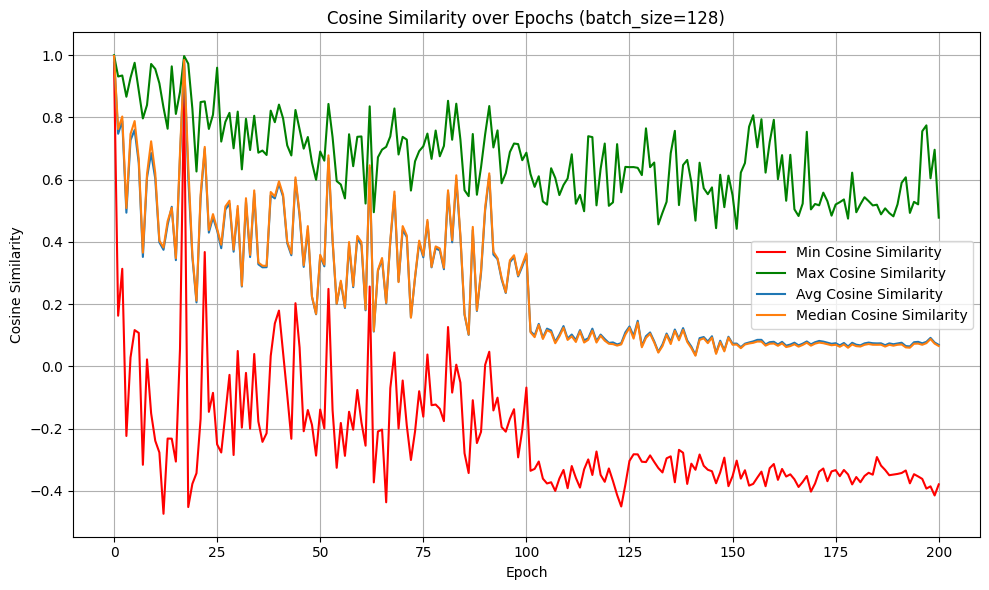

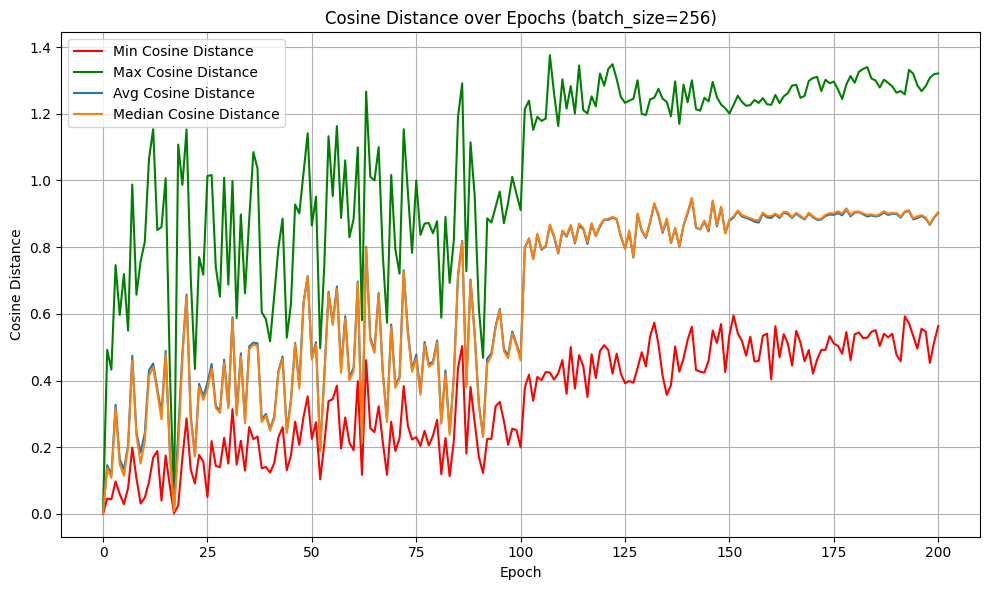

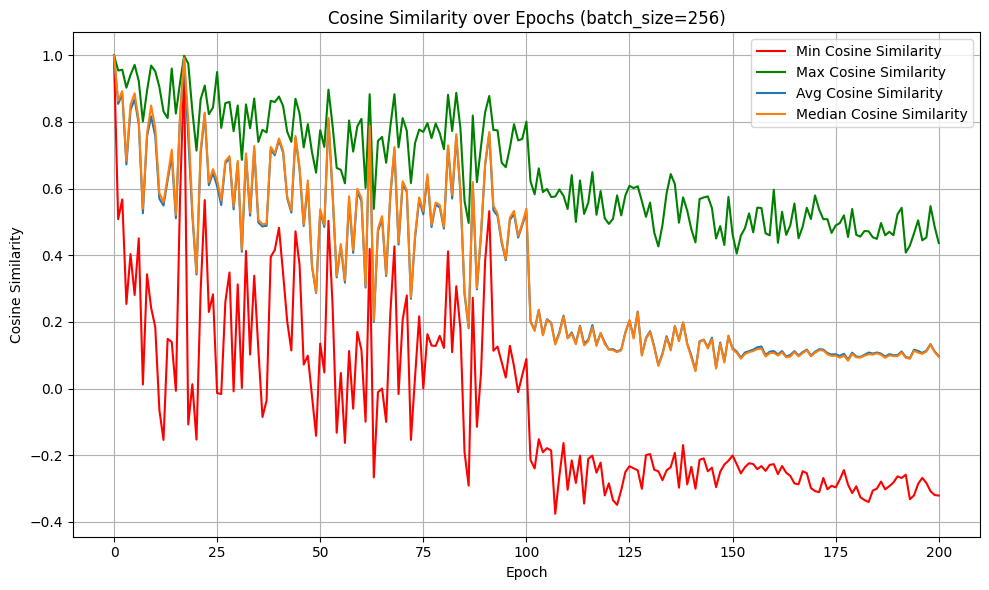

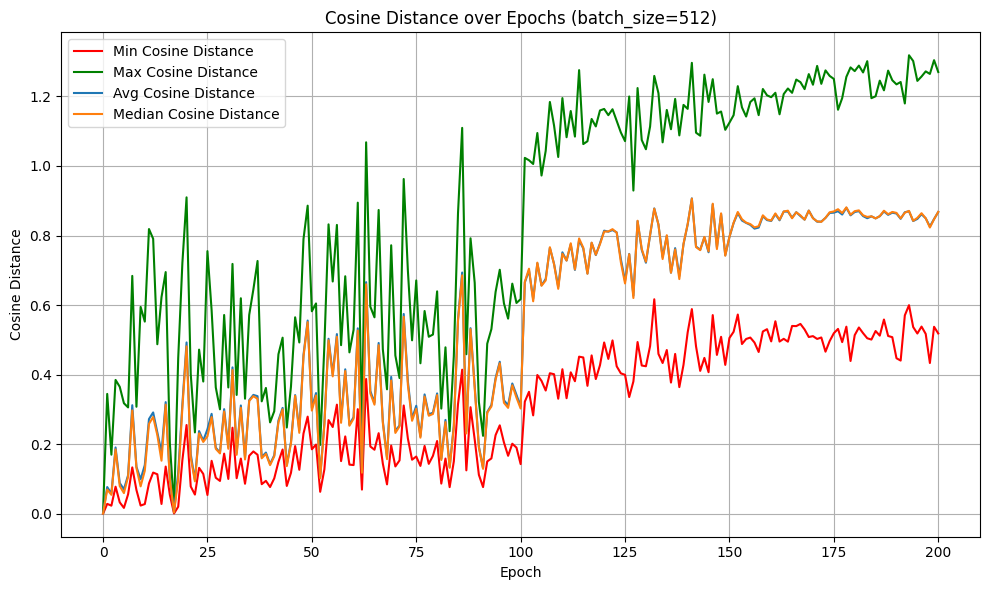

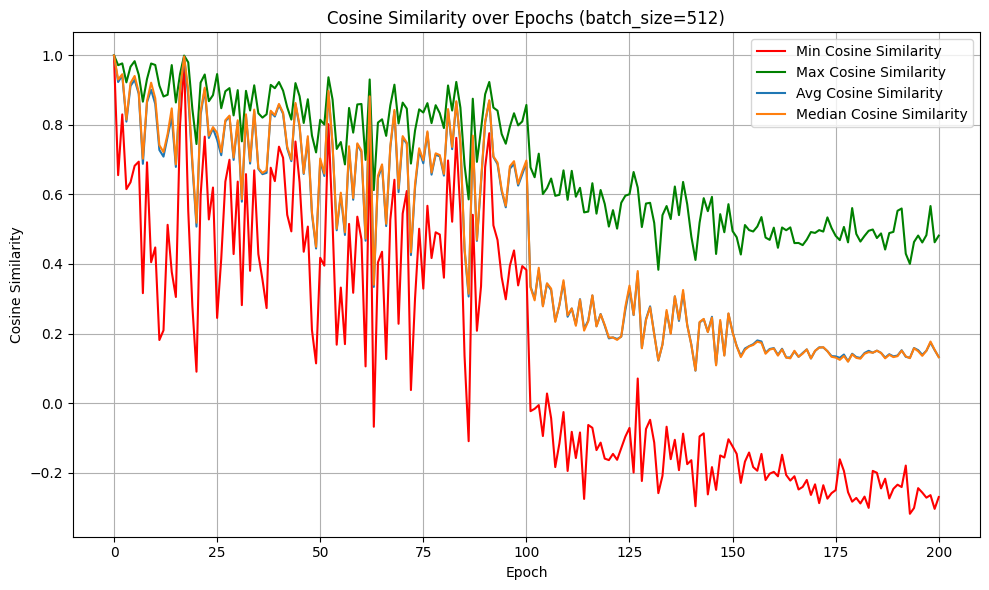

In [4]:
for size in batch_sizes:
    # Plotting the cosine distances
    plt.figure(figsize=(10, 6))
    plt.plot(dfs[size]['epoch'], dfs[size]['min_cosine_distance'], label='Min Cosine Distance', color='red')
    plt.plot(dfs[size]['epoch'], dfs[size]['max_cosine_distance'], label='Max Cosine Distance', color='green')
    plt.plot(dfs[size]['epoch'], dfs[size]['avg_cosine_distance'], label='Avg Cosine Distance')
    plt.plot(dfs[size]['epoch'], dfs[size]['median_cosine_distance'], label='Median Cosine Distance')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Cosine Distance')
    plt.title(f'Cosine Distance over Epochs (batch_size={size})')

    # Displaying the legend
    plt.legend()

    # Apply tight layout
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f'./figures/gc_cos_dist_{size}.pdf')
    plt.show()

    # Plotting the cosine similarities
    plt.figure(figsize=(10, 6))
    plt.plot(dfs[size]['epoch'], dfs[size]['min_cosine_similarity'], label='Min Cosine Similarity', color='red')
    plt.plot(dfs[size]['epoch'], dfs[size]['max_cosine_similarity'], label='Max Cosine Similarity', color='green')
    plt.plot(dfs[size]['epoch'], dfs[size]['avg_cosine_similarity'], label='Avg Cosine Similarity')
    plt.plot(dfs[size]['epoch'], dfs[size]['median_cosine_similarity'], label='Median Cosine Similarity')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Cosine Similarity')
    plt.title(f'Cosine Similarity over Epochs (batch_size={size})')

    # Displaying the legend
    plt.legend()

    # Apply tight layout
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f'./figures/gc_cos_sim_{size}.pdf')
    plt.show()


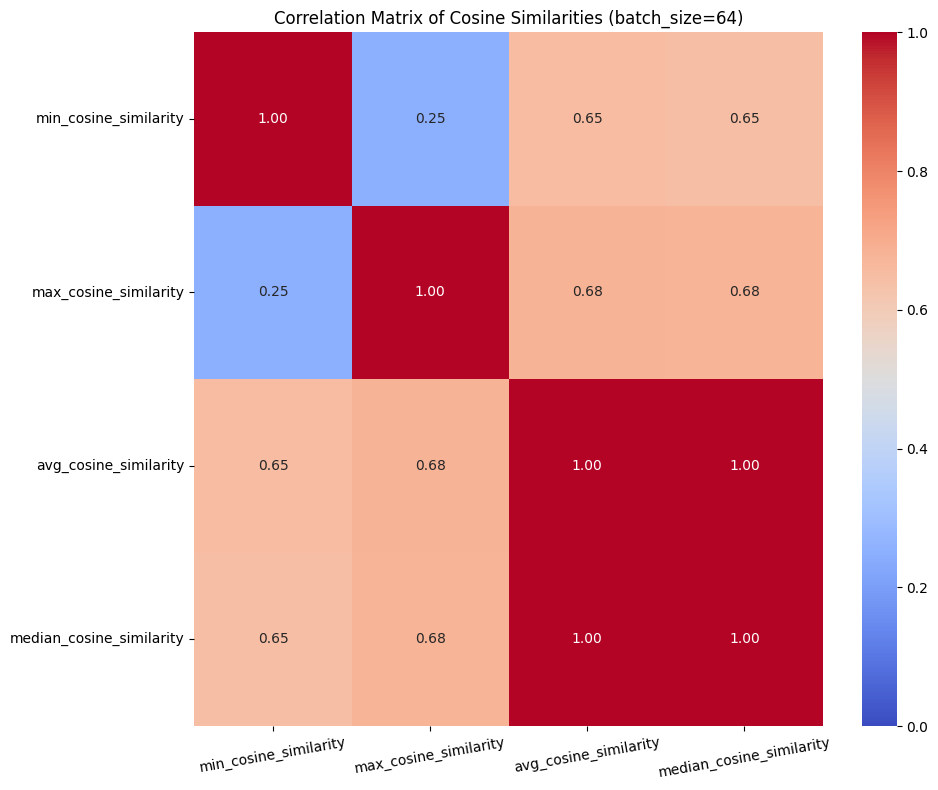

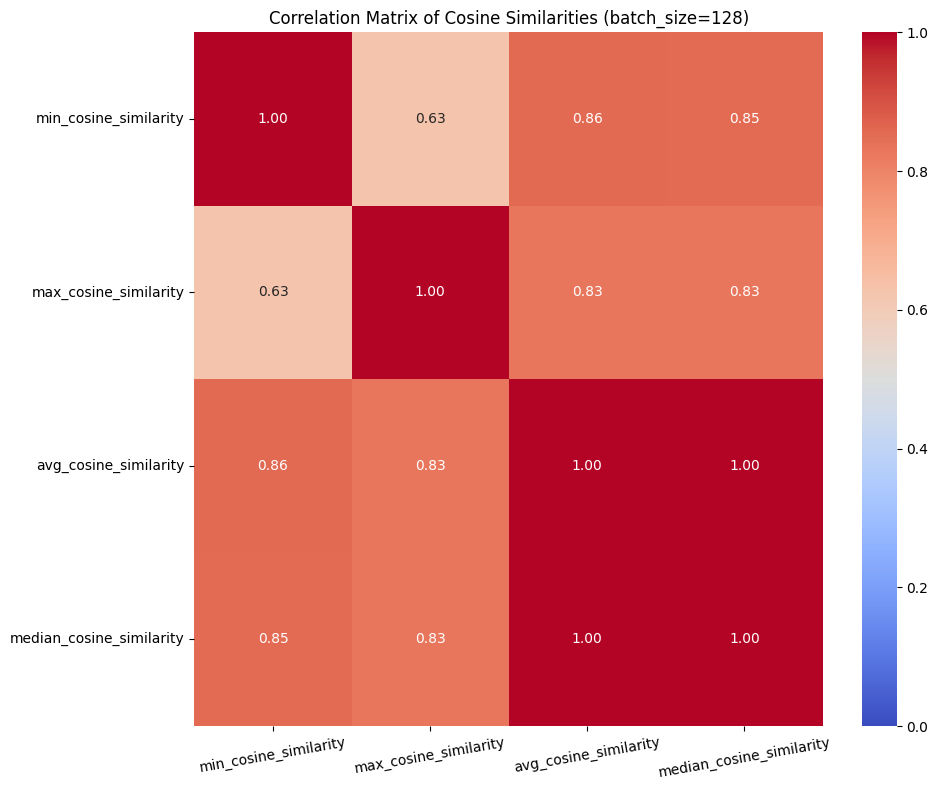

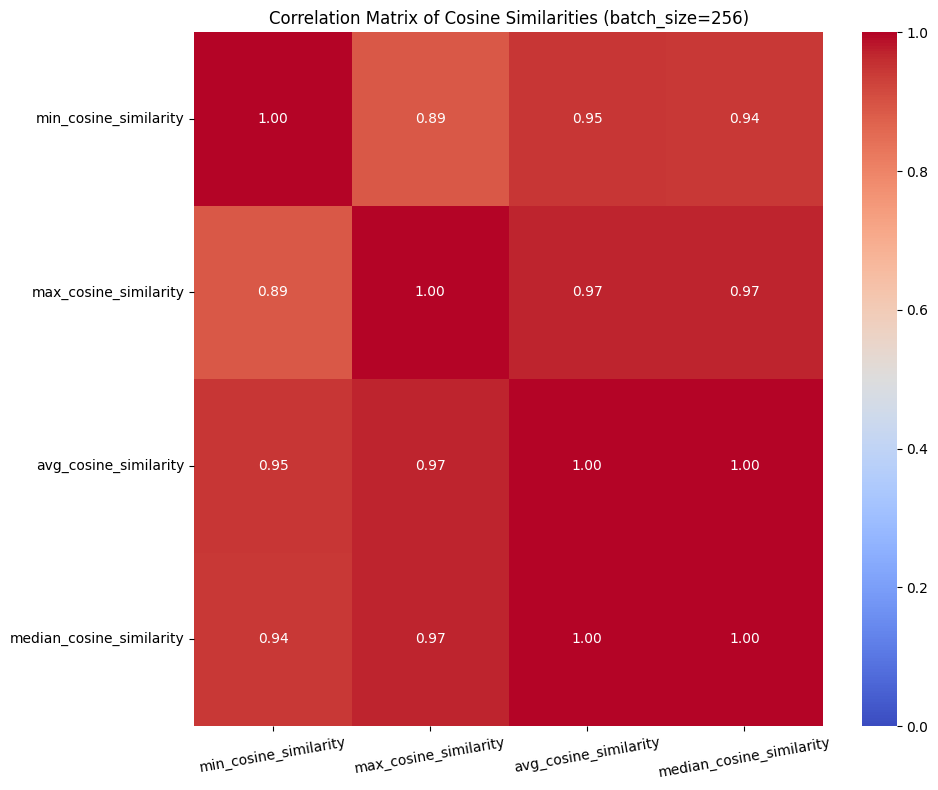

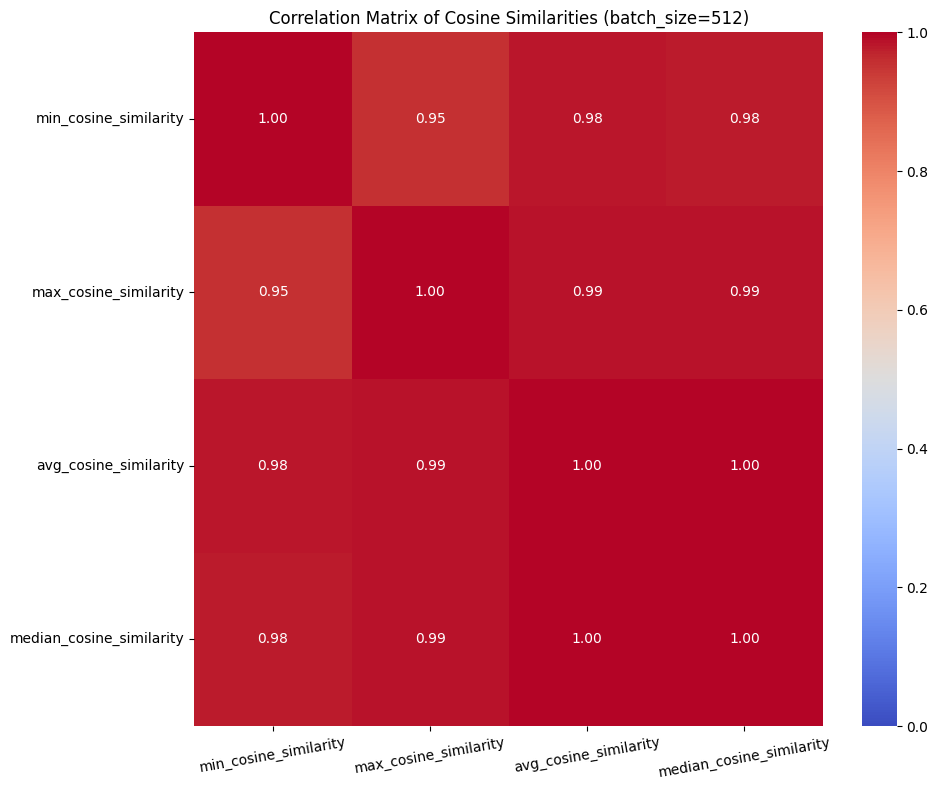

In [5]:
similarity_columns = ['min_cosine_similarity', 'max_cosine_similarity', 'avg_cosine_similarity', 'median_cosine_similarity']

for size in batch_sizes:
    # Calculate the correlation matrix for similarity columns only
    correlation_matrix_similarity = dfs[size][similarity_columns].corr()

    # Plot the heatmap with color scale from 0 to 1
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_similarity, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)

    # Adding labels and title
    plt.title(f'Correlation Matrix of Cosine Similarities (batch_size={size})')

    # Make xtick labels horizontal
    plt.xticks(rotation=10)

    # Apply tight layout
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'./figures/gc_correlation_cos_metrics_{size}.pdf')
    plt.show()

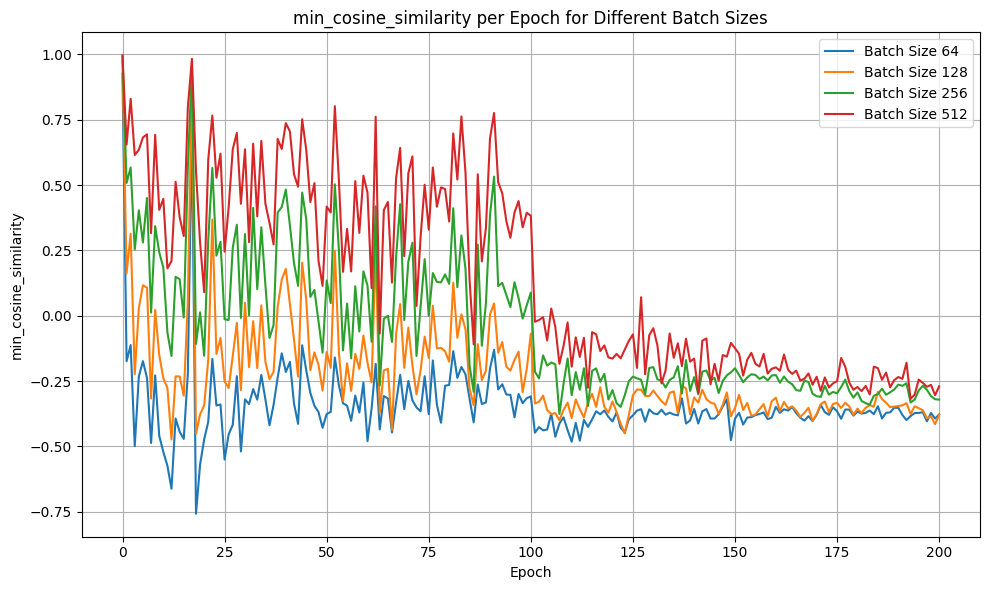

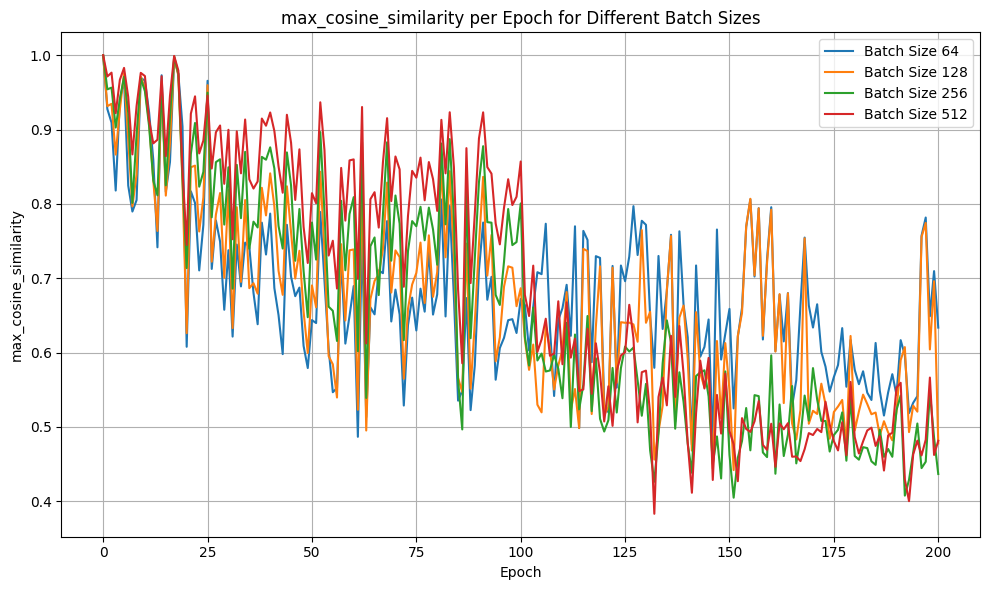

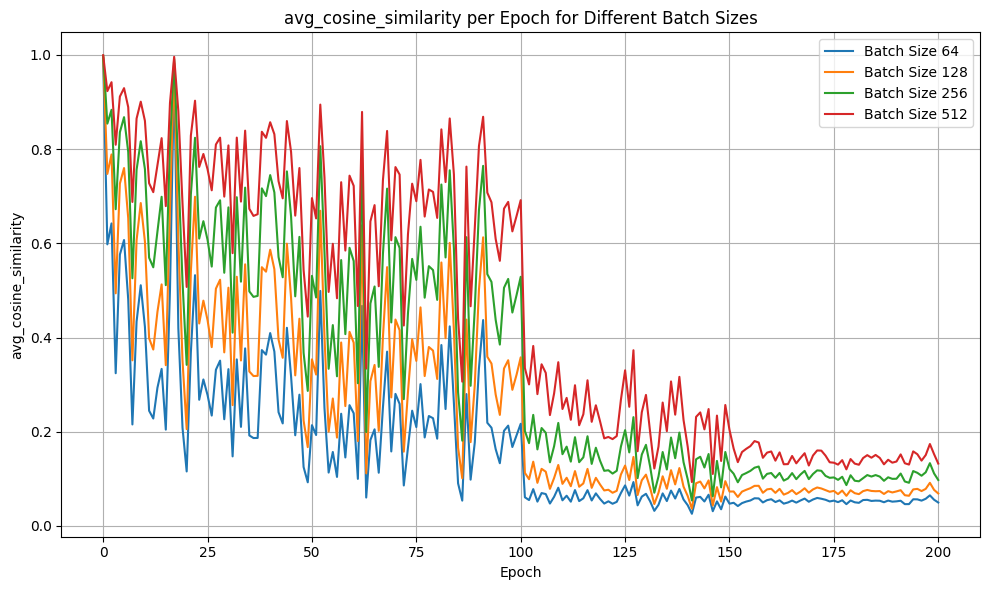

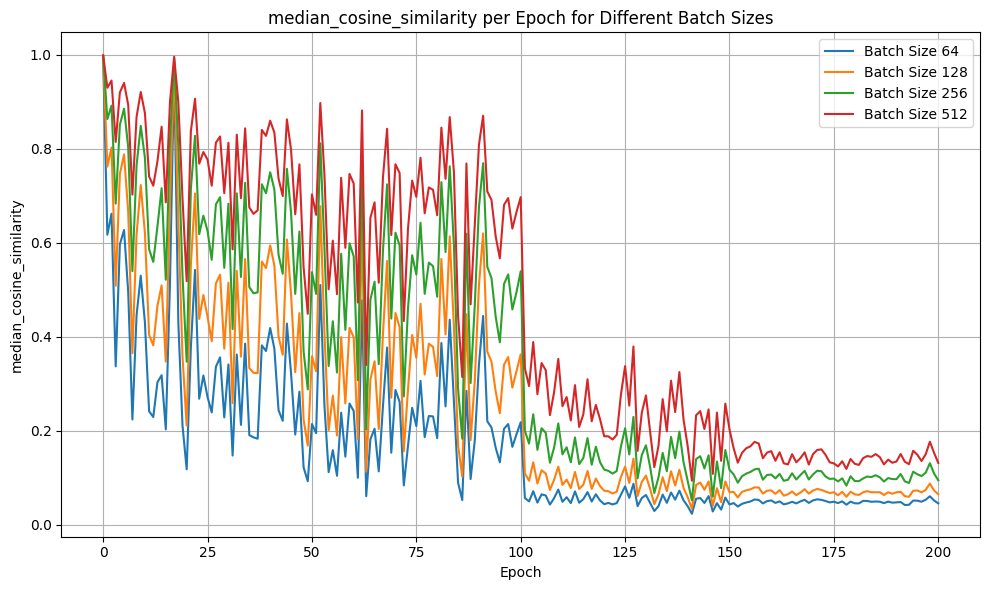

In [6]:

for metric in similarity_columns:
    # Plotting the min cosine similarity for each batch size
    plt.figure(figsize=(10, 6))
    for idx, size in enumerate(batch_sizes):
        plt.plot(dfs[size]['epoch'], dfs[size][metric], label=f'Batch Size {size}')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.ylabel(f'{metric}')
    plt.title(f'{metric} per Epoch for Different Batch Sizes')

    # Displaying the legend
    plt.legend()

    # Apply tight layout
    plt.tight_layout()

    # Show plot
    plt.grid(True)
    plt.savefig(f'./figures/gc_{metric}_batch_size.pdf')
    plt.show()

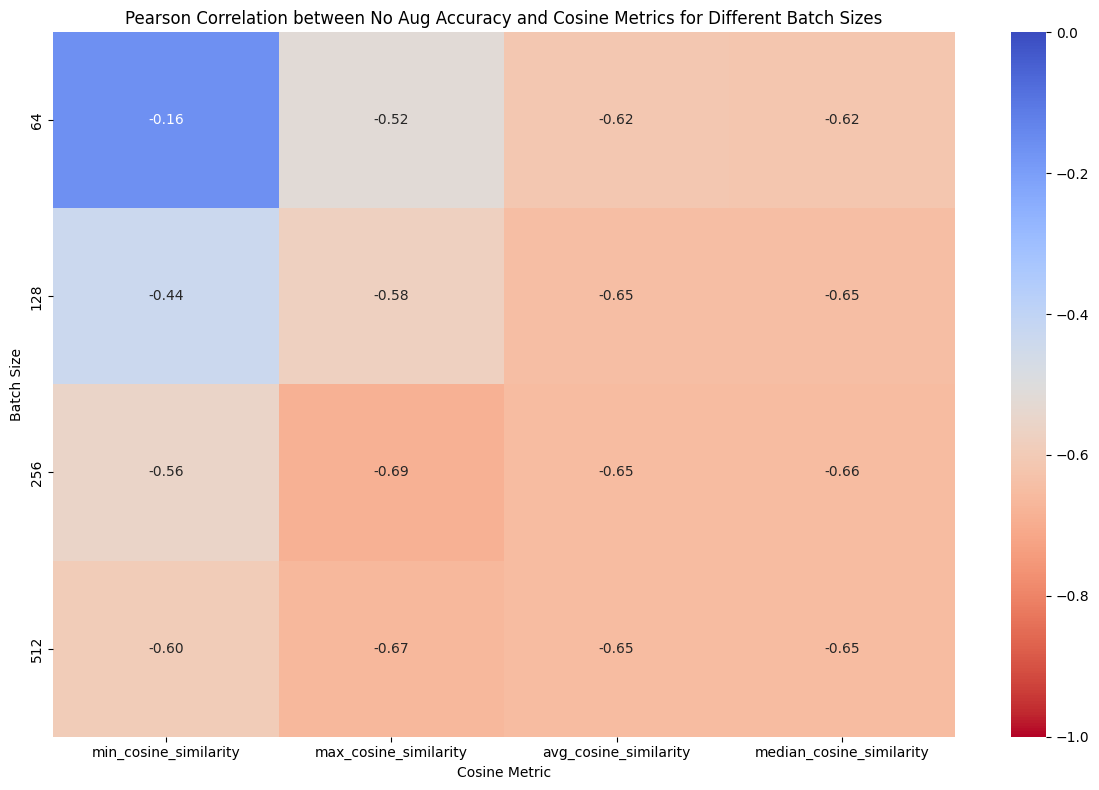

In [7]:
# Read the no augmentation results CSV data into a DataFrame
df_no_aug = pd.read_csv('./ResNet44_CIFAR10_no_aug_results.csv')

# Initialize a dictionary to store the correlations for each batch size
all_correlations = {}

for size in batch_sizes:
    # Calculate the Pearson correlation between no_aug accuracy and each cosine metric
    correlations = {}
    for metric in similarity_columns:
        correlations[metric] = df_no_aug['accuracy'].corr(dfs[size][metric])
    
    # Store the correlations in the dictionary
    all_correlations[size] = correlations

# Convert the dictionary to a DataFrame for easier plotting
correlation_matrix = pd.DataFrame(all_correlations).T

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f', vmin=-1, vmax=0)

# Adding labels and title
plt.xlabel('Cosine Metric')
plt.ylabel('Batch Size')
plt.title('Pearson Correlation between No Aug Accuracy and Cosine Metrics for Different Batch Sizes')

# Apply tight layout
plt.tight_layout()

# Save and show plot
plt.savefig('./figures/pearson_correlation_no_aug_accuracy_cosine_metrics_heatmap.pdf')
plt.show()


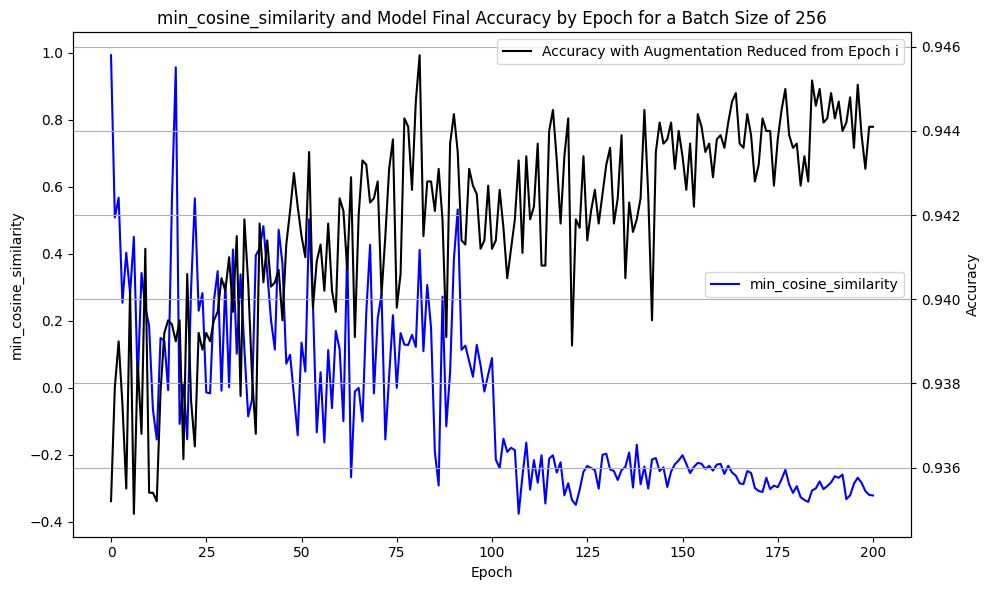

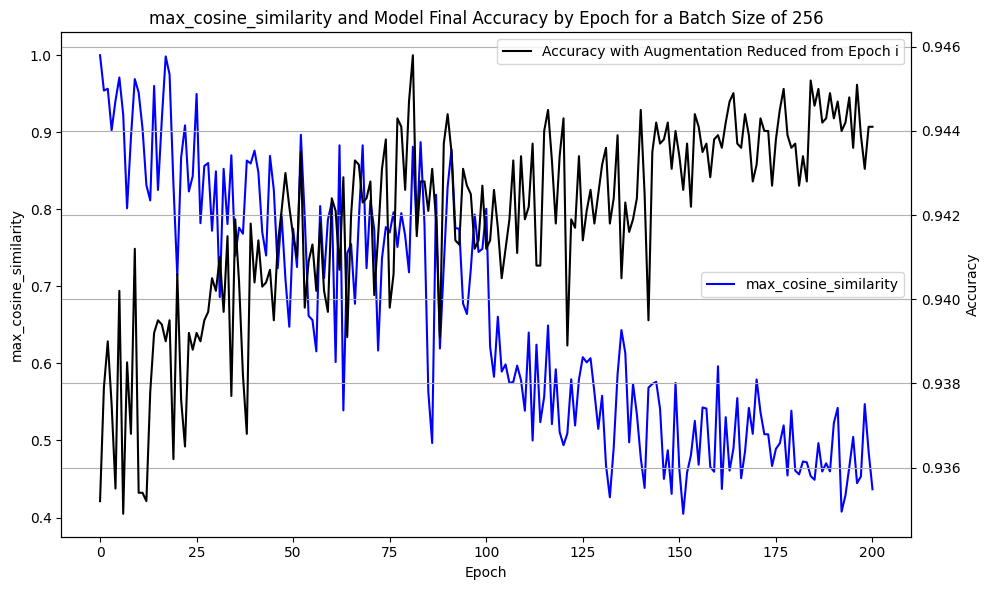

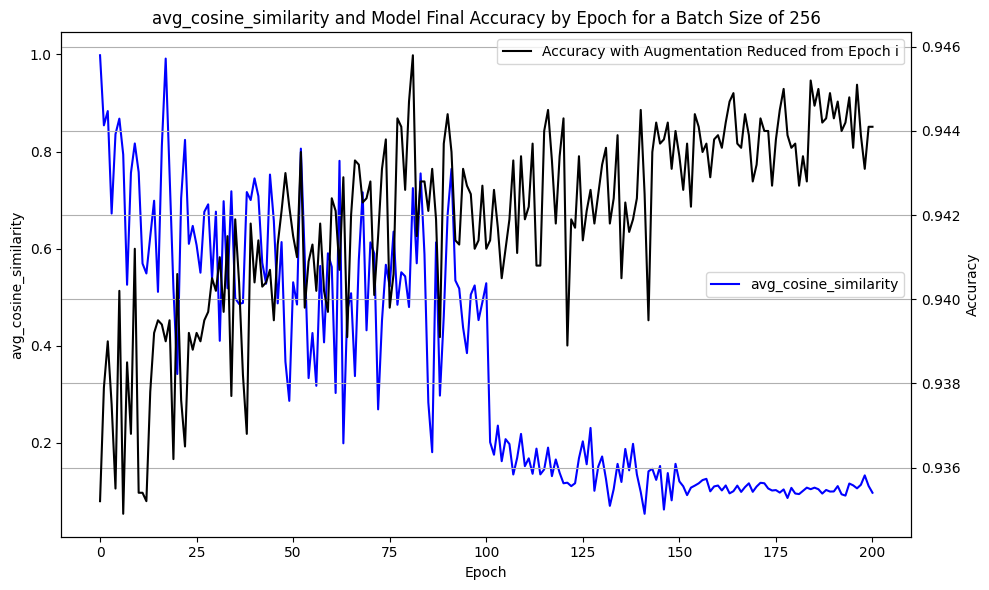

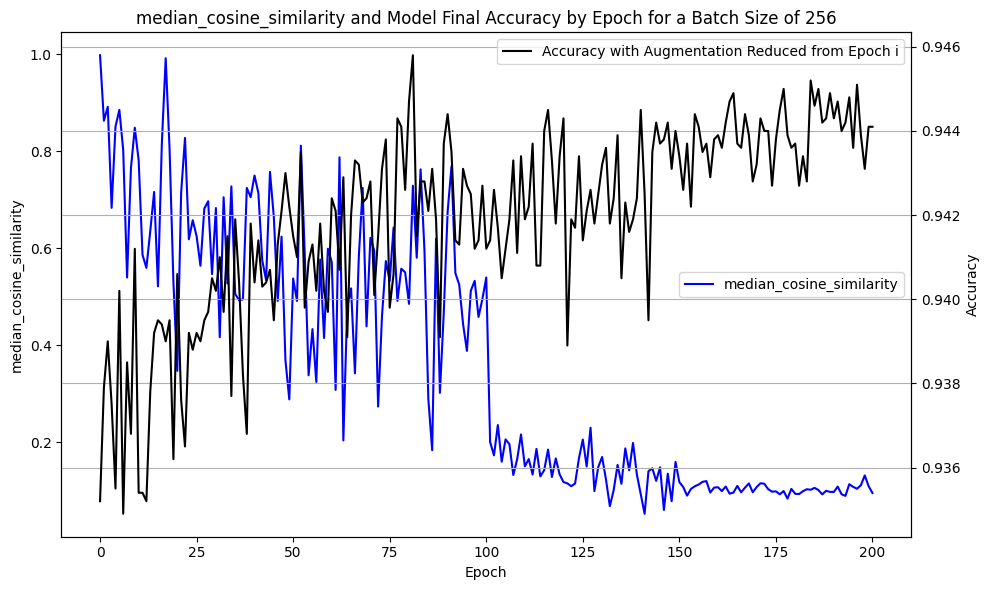

In [22]:
for metric in similarity_columns:
    size = 256
    # Plotting the min cosine similarity for each batch size
    plt.figure(figsize=(10, 6))
    plt.plot(dfs[size]['epoch'], dfs[size][metric], label=f'{metric}', color='blue')
        
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.plot(df_no_aug['epoch'], df_no_aug['accuracy'], label='Accuracy with Augmentation Reduced from Epoch i', color='black')
    ax2.set_ylabel('Accuracy')
    ax2.legend(loc='center right')

    # Adding labels and title
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel(f'{metric}')
    plt.title(f'{metric} and Model Final Accuracy by Epoch for a Batch Size of {size}')

    # Displaying the legend
    ax1.legend(loc='center right')
    plt.legend()

    # Apply tight layout
    plt.tight_layout()

    # Show plot
    plt.grid(True)
    plt.savefig(f'./figures/gc_{metric}_batch_size.pdf')
    plt.show()

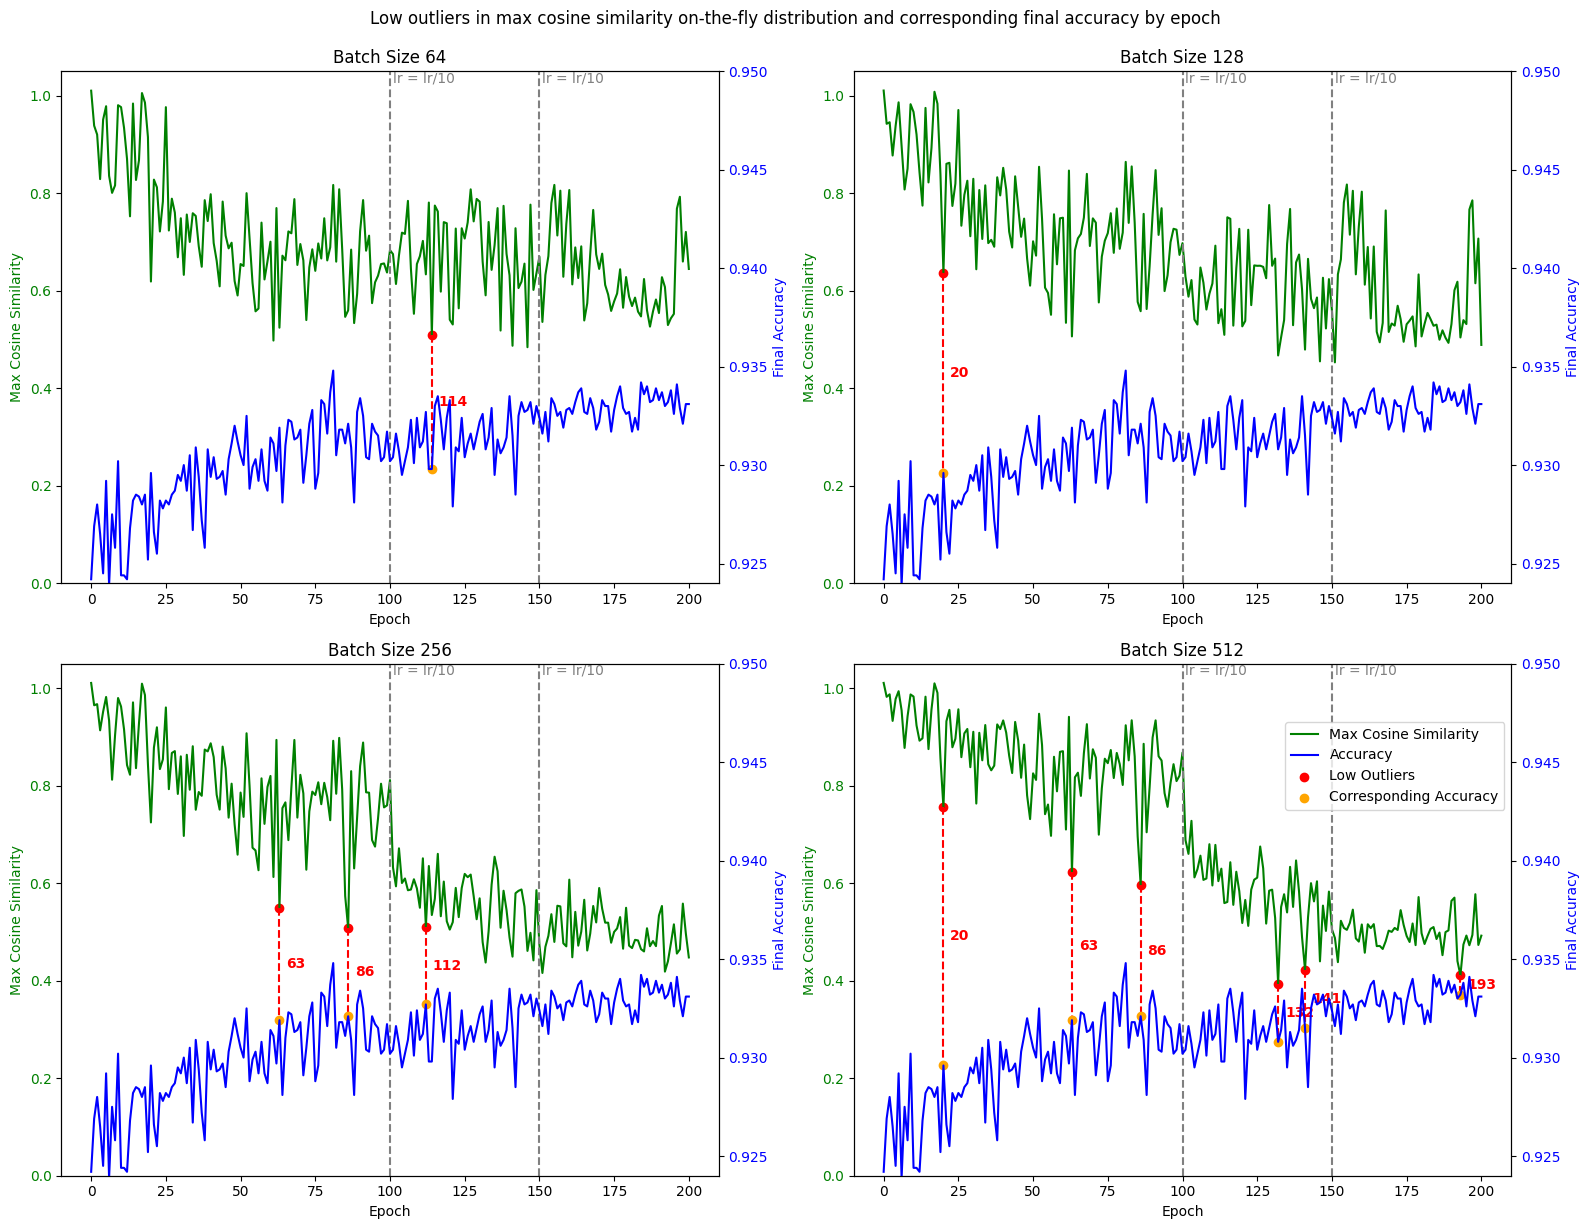

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

N = 200  # Number of low outliers to highlight
min_epochs = 10  # Minimum number of epochs before starting outlier detection

batch_sizes = [64, 128, 256, 512]

# Define the epochs where the distribution restarts (learning rate changes)
restart_epochs = [0, 100, 150]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Create a 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

for i, size in enumerate(batch_sizes):
    # Load the data
    grad_confusion_df = pd.read_csv(f'gradient_confusion_results_ResNet44_CIFAR10_batch_size_{size}.csv')
    acc_df = pd.read_csv('ResNet44_CIFAR10_no_aug_results.csv')

    # Merge the two datasets based on epoch
    merged_df = pd.merge(grad_confusion_df[['epoch', 'max_cosine_similarity']], acc_df[['epoch', 'accuracy']], on='epoch')

    # Initialize a list to collect outlier information
    outlier_info = []

    # Iterate over each epoch starting from min_epochs
    for idx in range(min_epochs, len(merged_df)):
        # Get the current epoch
        current_epoch = merged_df['epoch'].iloc[idx]

        # Determine the start of the current segment based on restart epochs
        # Find the largest restart_epoch that is less than or equal to current_epoch
        segment_start = max([e for e in restart_epochs if e <= current_epoch])

        # Data from the segment start to the current epoch
        current_data = merged_df[(merged_df['epoch'] >= segment_start) & (merged_df['epoch'] <= current_epoch)]

        # Ensure there are enough data points in the current segment
        if len(current_data) < min_epochs:
            continue  # Skip if not enough data to compute statistics

        # Compute Q1, Q3, and IQR for max_cosine_similarity in the current segment
        Q1 = current_data['max_cosine_similarity'].quantile(0.25)
        Q3 = current_data['max_cosine_similarity'].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR

        # Get the current epoch's max_cosine_similarity and accuracy
        current_sim = merged_df['max_cosine_similarity'].iloc[idx]
        current_acc = merged_df['accuracy'].iloc[idx]

        # Check if the current value is a low outlier
        if current_sim < lower_bound:
            outlier_info.append({
                'epoch': current_epoch,
                'max_cosine_similarity': current_sim,
                'accuracy': current_acc,
                'lower_bound': lower_bound
            })

    # If there are no outliers, inform the user
    if len(outlier_info) == 0:
        print(f"No low outliers found in max_cosine_similarity for batch size {size}.")
    else:
        # Convert outlier_info to a DataFrame
        outliers_df = pd.DataFrame(outlier_info)

        # Sort the outliers by max_cosine_similarity in ascending order
        sorted_outliers_df = outliers_df.sort_values(by='max_cosine_similarity')

        # Select the top N low outliers
        top_outliers_df = sorted_outliers_df.head(N)

        # Get the corresponding epochs, max_cosine_similarity, and accuracy
        top_outlier_epochs = top_outliers_df['epoch']
        top_outlier_sim = top_outliers_df['max_cosine_similarity']
        top_outlier_acc = top_outliers_df['accuracy']

        # Create axis for the current subplot
        ax1 = axs[i]

        # Shift values for both lines
        shift_value = 0.011

        # Plot max_cosine_similarity on the left y-axis (shifted up slightly)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Max Cosine Similarity', color='green')
        ax1.plot(merged_df['epoch'], merged_df['max_cosine_similarity'] + shift_value, label='Max Cosine Similarity', color='green')
        ax1.scatter(top_outlier_epochs, top_outlier_sim + shift_value, color='red', label='Low Outliers')
        ax1.set_ylim(0, 1.05)  # Adjust y-axis limit for shifted max_cosine_similarity

        # Add grid and legend for max_cosine_similarity
        ax1.tick_params(axis='y', labelcolor='green')
        ax1.grid(True)

        # Create a second y-axis for accuracy (shifted down slightly)
        ax2 = ax1.twinx()
        ax2.set_ylabel('Final Accuracy', color='blue')
        ax2.plot(merged_df['epoch'], merged_df['accuracy'] - shift_value, label='Accuracy', color='blue')
        ax2.scatter(top_outlier_epochs, top_outlier_acc - shift_value, color='orange', label='Corresponding Accuracy')
        ax2.set_ylim(0.924, 0.95)  # Adjust y-axis limit for shifted accuracy

        # Add legend for accuracy
        ax2.tick_params(axis='y', labelcolor='blue')

        # Highlight top outlier points on both curves and draw vertical dashed lines
        for epoch, sim, acc in zip(top_outlier_epochs, top_outlier_sim, top_outlier_acc):
            # x-value
            x = epoch
            # y-values in data coordinates
            y1 = sim + shift_value  # Max cosine similarity value on ax1
            y2 = acc - shift_value  # Accuracy value on ax2
            # Transform y2 from ax2's data coordinates to ax1's data coordinates
            x_display, y2_display = ax2.transData.transform((x, y2))
            y2_in_ax1 = ax1.transData.inverted().transform((x_display, y2_display))[1]
            # Plot the vertical dashed line connecting the two points
            ax1.plot([x, x], [y1, y2_in_ax1], 'r--')
            # Calculate the midpoint of y1 and y2_in_ax1
            y_mid = (y1 + y2_in_ax1) / 2
            # Annotate the epoch value at the midpoint
            ax1.annotate(f'{epoch}', xy=(x, y_mid), xytext=(5, 0), textcoords='offset points',
                         ha='left', va='center', color='red', fontsize=10, fontweight='bold')

        # Add vertical lines to indicate where the learning rate changes
        for lr_epoch in restart_epochs[1:]:  # Skip the first epoch (0)
            ax1.axvline(x=lr_epoch, color='gray', linestyle='--')
            ax1.text(lr_epoch + 1, ax1.get_ylim()[1], f'lr = lr/10', color='gray', ha='left', va='top')

        # Add title
        ax1.set_title(f'Batch Size {size}')
        
# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend([lines[0], lines2[0], lines[1], lines2[1]], [labels[0], labels2[0], labels[1], labels2[1]], loc='upper right', bbox_to_anchor=(1, 0.9))

# Adjust layout and show the plot
plt.tight_layout()

# Hide grid
for ax in axs:
    ax.grid(False)
    
# Add global title with upper space
plt.suptitle(f'Low outliers in max cosine similarity on-the-fly distribution and corresponding final accuracy by epoch', y=1.02)

plt.savefig(f'./figures/max_sim_low_outliers.pdf', bbox_inches='tight')

plt.show()
